<a href="https://colab.research.google.com/github/Rajagopalhertzian/GAN/blob/main/GAN_CGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### GAN using PyTorch with the FashionMNIST dataset

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim

In [ ]:
train_data =datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=transforms.ToTensor(),# transform data
    target_transform=None # how do we want to transform labels
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.3MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 168kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.27MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 3.67MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
# Hyperparameters
latent_dim = 100
image_size = 28 * 28  # FashionMNIST images are 28x28
batch_size = 32  # Use a smaller batch size for smaller datasets
epochs = 5
lr = 0.0002
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1] range
])

train_dataset = datasets.FashionMNIST(root="./data", train=True, transform=transform, download=False)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:

class Generator(nn.Module):
    def __init__(self, latent_dim, image_size):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, image_size),
            nn.Tanh()  # Output normalized to [-1, 1]
        )

    def forward(self, z):
        return self.model(z)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, image_size):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(image_size, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Output probability
        )

    def forward(self, x):
        return self.model(x)

In [ ]:

generator = Generator(latent_dim, image_size).to(device)
discriminator = Discriminator(image_size).to(device)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

47140
18132
5786
49862
22066
34633
7959
22837
7474
16375
15732
638
37395
8824
2314
8474


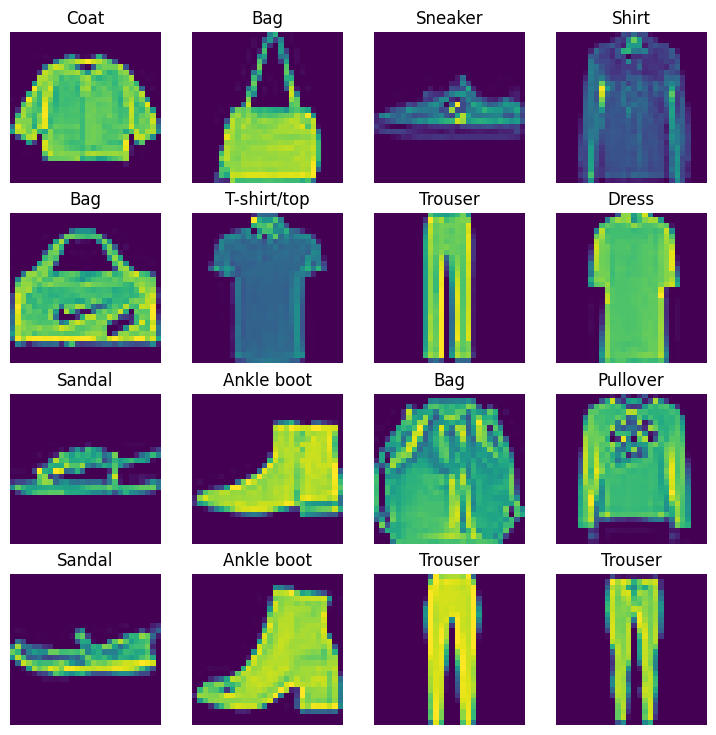

In [ ]:
# original datA
fig = plt.figure(figsize=(9,9))
rows ,cols=4,4
for i in range(1, rows*cols+1):
    #print(i)
    randomindex=torch.randint(0,len(train_data),size=[1]).item()
    print(randomindex)

    img,label=train_data[randomindex]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze())
    plt.axis(False)
    plt.title(train_data.classes[label])

In [ ]:

for epoch in range(epochs):
    for batch_idx, (real_images, _) in enumerate(train_loader):
        # Flatten real images and move to device
        real_images = real_images.view(-1, image_size).to(device)

        # Create labels dynamically based on batch size
        real_labels = torch.ones(real_images.size(0), 1).to(device)
        fake_labels = torch.zeros(real_images.size(0), 1).to(device)

        # Train Discriminator
        optimizer_D.zero_grad()

        # Real images loss
        real_loss = criterion(discriminator(real_images), real_labels)

        # Generate fake images
        z = torch.randn(real_images.size(0), latent_dim).to(device)
        fake_images = generator(z)

        # Fake images loss
        fake_loss = criterion(discriminator(fake_images.detach()), fake_labels)

        # Total Discriminator loss
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()

        # Generate fake images again
        g_loss = criterion(discriminator(fake_images), real_labels)  # Trick discriminator
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

Epoch [1/10] | D Loss: 0.1863 | G Loss: 3.5603
Epoch [2/10] | D Loss: 0.8466 | G Loss: 1.2942
Epoch [3/10] | D Loss: 1.2550 | G Loss: 1.2015
Epoch [4/10] | D Loss: 1.2421 | G Loss: 1.0372
Epoch [5/10] | D Loss: 1.1539 | G Loss: 1.0527
Epoch [6/10] | D Loss: 1.2038 | G Loss: 0.9733
Epoch [7/10] | D Loss: 1.2837 | G Loss: 0.8854
Epoch [8/10] | D Loss: 1.3095 | G Loss: 0.7790
Epoch [9/10] | D Loss: 1.2834 | G Loss: 0.8680
Epoch [10/10] | D Loss: 1.3686 | G Loss: 0.7370


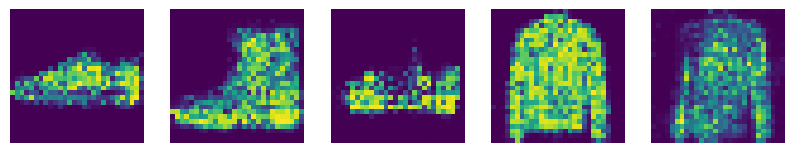

In [ ]:
def generate_and_plot(generator, latent_dim, n_images=5):
    generator.eval()
    z = torch.randn(n_images, latent_dim).to(device)
    fake_images = generator(z).view(-1, 1, 28, 28).detach().cpu()
    generator.train()

    plt.figure(figsize=(10, 2))
    for i in range(n_images):
        plt.subplot(1, n_images, i+1)
        plt.imshow(fake_images[i].squeeze())
        plt.axis("off")
    plt.show()

# Generate and visualize images
generate_and_plot(generator, latent_dim)

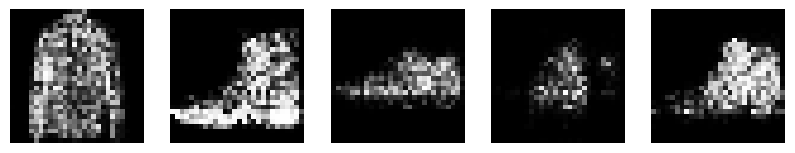

In [ ]:
def generate_and_plot(generator, latent_dim, n_images=5):
    generator.eval()
    z = torch.randn(n_images, latent_dim).to(device)
    fake_images = generator(z).view(-1, 1, 28, 28).detach().cpu()
    generator.train()

    plt.figure(figsize=(10, 2))
    for i in range(n_images):
        plt.subplot(1, n_images, i+1)
        plt.imshow(fake_images[i].squeeze(),cmap='gray')
        plt.axis("off")
    plt.show()

# Generate and visualize images
generate_and_plot(generator, latent_dim)

# |cGAN

To generate images for specific classes in the FashionMNIST dataset using a GAN, you can modify the generator to condition it on the class labels. This technique is called a Conditional GAN (cGAN). Here's how you can adapt the code:

In [ ]:
class_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

In [ ]:
class ConditionalGenerator(nn.Module):
    def __init__(self, latent_dim, num_classes, image_size):
        super(ConditionalGenerator, self).__init__()
        self.label_embedding = nn.Embedding(num_classes, num_classes)
        self.model = nn.Sequential(
            nn.Linear(latent_dim + num_classes, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, image_size),
            nn.Tanh()
        )

    def forward(self, z, labels):
        # Concatenate latent vector and label embedding
        c = self.label_embedding(labels)
        x = torch.cat([z, c], dim=1)
        return self.model(x)

In [ ]:
class ConditionalDiscriminator(nn.Module):
    def __init__(self, num_classes, image_size):
        super(ConditionalDiscriminator, self).__init__()
        self.label_embedding = nn.Embedding(num_classes, num_classes)
        self.model = nn.Sequential(
            nn.Linear(image_size + num_classes, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x, labels):
        # Concatenate image and label embedding
        c = self.label_embedding(labels)
        x = torch.cat([x, c], dim=1)
        return self.model(x)

In [ ]:

num_classes = 10  # FashionMNIST has 10 classes
generator = ConditionalGenerator(latent_dim, num_classes, image_size).to(device)
discriminator = ConditionalDiscriminator(num_classes, image_size).to(device)

for epoch in range(epochs):
    for batch_idx, (real_images, labels) in enumerate(train_loader):
        real_images = real_images.view(-1, image_size).to(device)
        labels = labels.to(device)

        # Real labels for real images
        real_targets = torch.ones(real_images.size(0), 1).to(device)
        fake_targets = torch.zeros(real_images.size(0), 1).to(device)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = criterion(discriminator(real_images, labels), real_targets)

        z = torch.randn(real_images.size(0), latent_dim).to(device)
        fake_labels = torch.randint(0, num_classes, (real_images.size(0),)).to(device)
        fake_images = generator(z, fake_labels)
        fake_loss = criterion(discriminator(fake_images.detach(), fake_labels), fake_targets)

        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        g_loss = criterion(discriminator(fake_images, fake_labels), real_targets)  # Trick discriminator
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

Epoch [1/10] | D Loss: 1.3925 | G Loss: 0.7074
Epoch [2/10] | D Loss: 1.3836 | G Loss: 0.7094
Epoch [3/10] | D Loss: 1.3782 | G Loss: 0.7084
Epoch [4/10] | D Loss: 1.3848 | G Loss: 0.7091
Epoch [5/10] | D Loss: 1.3825 | G Loss: 0.7092
Epoch [6/10] | D Loss: 1.3761 | G Loss: 0.7080
Epoch [7/10] | D Loss: 1.3837 | G Loss: 0.7095
Epoch [8/10] | D Loss: 1.3860 | G Loss: 0.7096
Epoch [9/10] | D Loss: 1.3806 | G Loss: 0.7108
Epoch [10/10] | D Loss: 1.3817 | G Loss: 0.7088


enter class to generateSneaker


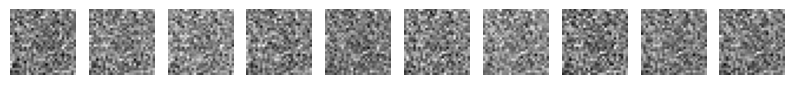

In [ ]:
def generate_images_for_class(generator, latent_dim, class_label, n_images=10):
    generator.eval()
    z = torch.randn(n_images, latent_dim).to(device)
    labels = torch.tensor([class_label] * n_images).to(device)  # Same class label for all images
    fake_images = generator(z, labels).view(-1, 1, 28, 28).detach().cpu()
    generator.train()

    plt.figure(figsize=(10, 2))
    for i in range(n_images):
        plt.subplot(1, n_images, i + 1)
        plt.imshow(fake_images[i].squeeze(), cmap="gray")
        plt.axis("off")
    plt.show()

# Example: Generate images for the "Sneaker" class
class_name = input('enter class to generate')
class_label = list(class_names.keys())[list(class_names.values()).index(class_name)]
generate_images_for_class(generator, latent_dim, class_label)

In [51]:

generator = ConditionalGenerator(latent_dim, num_classes, image_size)
discriminator = ConditionalDiscriminator(num_classes, image_size)

# Save the generator model
torch.save(generator.state_dict(), 'generator.pth')

# Save the discriminator model (optional, if you need it)
torch.save(discriminator.state_dict(), 'discriminator.pth')